In [1]:
import xgboost
import shap
import pandas as pd
import numpy

In [2]:
# load JS visualization code to notebook
shap.initjs()

In [3]:
# read the data
dataset = pd.read_csv('../data/airbnb_total.csv', index_col=0)

In [4]:
dataset.drop('review_scores_accuracy', axis=1, inplace=True)

In [5]:
dataset.shape

(521221, 137)

In [6]:
array = dataset.values
cols = [col for col in dataset.columns if col not in ['satisfaction']]
X = dataset[cols]
y = dataset['satisfaction']

In [7]:
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [8]:
# explain the model's predictions using SHAP values.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

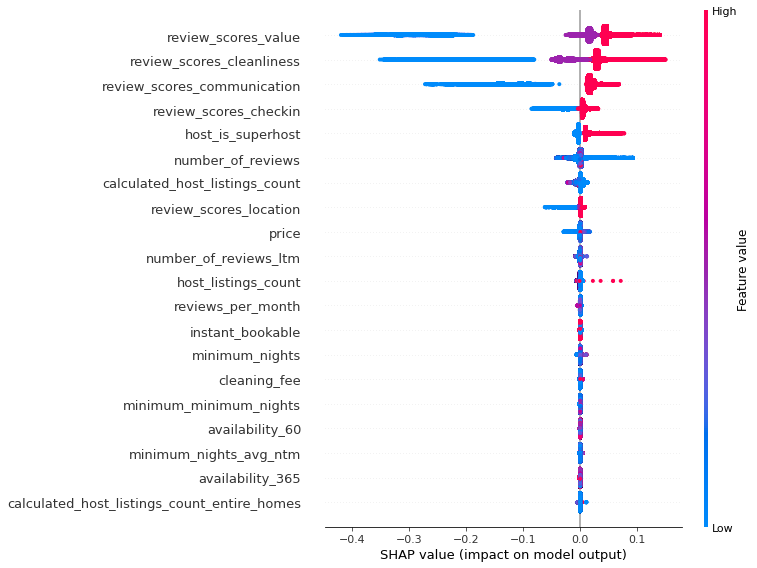

In [9]:
shap.summary_plot(shap_values, X)

In [1]:
# visualize the first prediction's explanation
for col in dataset.columns:
    if col not in ['satisfaction']:
        shap.dependence_plot(col, shap_values, X)

NameError: name 'dataset' is not defined

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000,:])
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

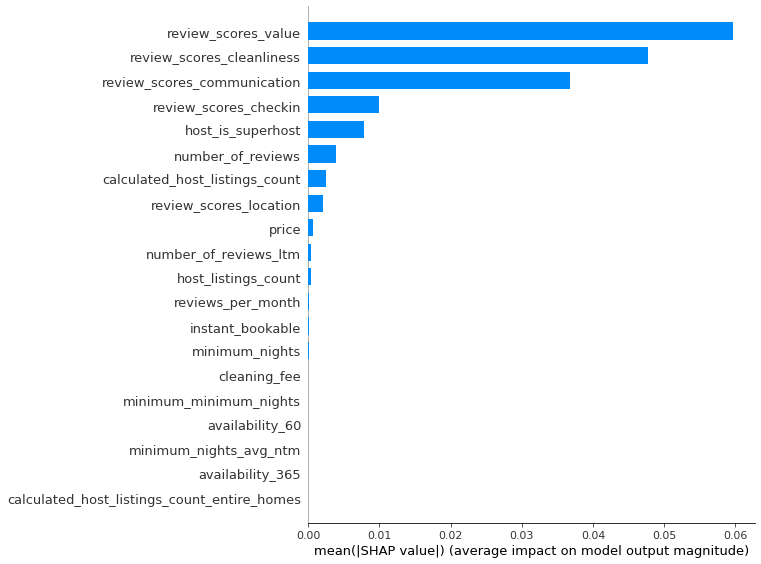

In [10]:
shap.summary_plot(shap_values, X, plot_type="bar")